## Numerical Programming with Python, Part 2:   <a class="tocSkip">
## Intro to NumPy, SciPy, and Pandas (and Matplotlib)  <a class="tocSkip">

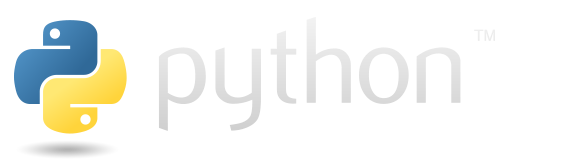

# Brief review from the end of last week

## Functions

Simple example: compound interest calculator with annual contributions

* p = principal
* r = annual interest rate in percent
* y = year of the balance
* c = annual contribution (made at the start of the year)

$$\text{Balance}(y) = p(1 + r)^y + c\left[\frac{(1 + r)^{y+1} - (1 + r)}{r} \right]$$

In [ ]:
def investment_balance(principal,rate,year,contribution):
    p = principal
    r = rate/100
    y = year
    c = contribution
    balance = p*(1 + r)**y + c*( ((1 + r)**(y+1) - (1 + r)) / r )
    return balance

In [ ]:
investment_balance(rate=5, principal=1000, contribution=100, year=1)

## Modules

In [ ]:
import benpy

In [ ]:
benpy.compound_calculator(rate=5, principal=1000, contribution=100, year=1)

## Using these to look at series of data

In [ ]:
# set these as constants
p = 1000
y = 1
c = 100

In [ ]:
rates = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
balance = []
for i in rates:
    r = i
    balance.append(benpy.compound_calculator(p,r,y,c))
print(balance)

This is what we might like to do:
`balance = benpy.compound_calculator(p,rates,y,c)`

Numpy can help.

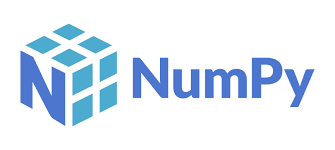

https://numpy.org/

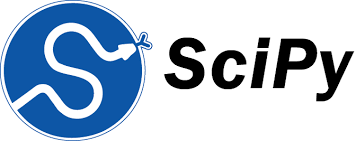

https://www.scipy.org/

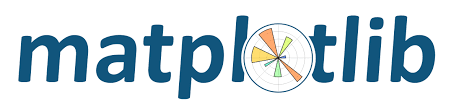

https://matplotlib.org/

The "SciPy ecosystem" of scientific computing in Python builds upon a small core of packages:
https://www.scipy.org/about.html

* **Python**, a general purpose programming language. It is interpreted and dynamically typed and is very well suited for interactive work and quick prototyping, while being powerful enough to write large applications in.

* **NumPy**, the fundamental package for numerical computation. It defines the numerical array and matrix types and basic operations on them.

* The **SciPy library**, a collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics, and much more.

* **Matplotlib**, a mature and popular plotting package that provides publication-quality 2-D plotting, as well as rudimentary 3-D plotting.

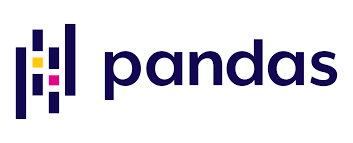

https://pandas.pydata.org/

Data manipulation in Python can be greatly facilitated with the Pandas library, and it may be one of the most widely used tools for data science.

Pandas data-manipulation capabilities are built on top of NumPy, utilizing its fast array processing, and its graphing capabilities are built on top of Matplotlib.

## Using NumPy to look at series of data

In [ ]:
# set these as constants
p = 1000
y = 1
c = 100

In [ ]:
rates = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
balance = []
for i in rates:
    r = i
    balance.append(benpy.compound_calculator(p,r,y,c))
print(balance)

This is what we might like to do:
`balance = benpy.compound_calculator(p,rates,y,c)`

In [ ]:
import numpy as np

In [ ]:
ratesnp = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
ratesnp

In [ ]:
balancenp = benpy.compound_calculator(p,ratesnp,y,c)

In [ ]:
balancenp

### We're going to use a bit of ipython "magics" to look at timings.... this won't work in scripts, but works well here in the Jupyter notebook

In [ ]:
%%timeit
balance = []
for i in rates:
    r = i
    balance.append(benpy.compound_calculator(p,r,y,c))

In [ ]:
%%timeit
balancenp = benpy.compound_calculator(p,ratesnp,y,c)

In [ ]:
ratesnp = np.arange(1,11)

In [ ]:
ratesnp

In [ ]:
%%timeit
balance = []
for i in range(1,10000):
    r = i
    balance.append(benpy.compound_calculator(p,r,y,c))

In [ ]:
%%timeit
ratesnp = np.arange(1,10000)
balancenp = benpy.compound_calculator(p,ratesnp,y,c)

# basic operations with n-dimensional arrays

In [ ]:
ratesnp

In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([[-4,-3],[-2,-1]])

In [ ]:
a

In [ ]:
b

In [ ]:
a+b

In [ ]:
a-b

In [ ]:
a/b

In [ ]:
a*b

In [ ]:
np.matmul(a,b)

In [ ]:
# array attributes
print(a.ndim)
print(a.shape)
print(a.size)
print(a.dtype)

In [ ]:
a.T

# Indexing and slicing

In [ ]:
a[0]

In [ ]:
a[0:2]

In [ ]:
a[1:4]

In [ ]:
a[2:4]

In [ ]:
a

In [ ]:
a[0:1,0]

In [ ]:
a[:,0]

In [ ]:
a[1,:]

In [ ]:
a > 2

In [ ]:
a[a > 2]

In [ ]:
a[a % 2 == 0]

# creating some arrays

In [ ]:
np.arange(10)

In [ ]:
np.arange(1,11,0.5)

In [ ]:
np.arange(-1,1,0.2)

In [ ]:
np.linspace(-1,1,11)

In [ ]:
np.linspace(0,2*np.pi,100)

In [ ]:
x = np.linspace(0,2*np.pi,100)
y = np.cos(x)

In [ ]:
y

Let's plot for fun.... briefly use matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(x,y,'ro')

In [ ]:
a2 = np.arange(10).reshape((2,5))

In [ ]:
a2

In [ ]:
a2.reshape(10)

In [ ]:
a2.reshape((3,4))

In [ ]:
a2.reshape((10,1))

# Broadcasting

In [ ]:
a2 = a2.reshape((10,1))

In [ ]:
a2

In [ ]:
b2 = np.array([1,2,3])

In [ ]:
b2

In [ ]:
a2 + b2

Broadcasting:  numpy will compare array shapes and consider respective dimensions to be compatible if:
1. they are equal
2. one of them is 1

In [ ]:
a3 = np.array([[3,4,5],[6,7,8]])
b3 = np.array([[1,2,3]])

In [ ]:
a3 * b3

Another (intuitive) example:  adding or multiplying a matrix by a scalar

In [ ]:
2 * a3 + 1

# operations along axes

In [ ]:
a

In [ ]:
a.sum()

In [ ]:
a.sum(axis=0)

In [ ]:
a.sum(axis=1)

In [ ]:
a.cumsum()

In [ ]:
a.cumsum(axis=1)

In [ ]:
a.min()

In [ ]:
a.min(axis=0)

In [ ]:
a.max()

In [ ]:
a.max(axis=1)

# numpy submodules

There is a wide range of mathematical functionality provided in the numpy library (See for example https://numpy.org/doc/stable/reference/routines.html)

Some of key submodules include:
* numpy.linalg - linear algebra
* numpy.fft - Fourier transforms
* numpy.random - random sampling and various distributions

## Final numpy fun - estimating $\pi$

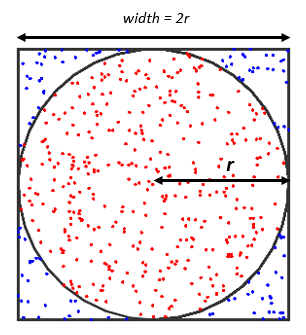

The fraction of sample points that make it into the circle is:

$$\frac{N_{inside}}{N_{total}} = \frac{\pi r^2}{4 r^2}$$

so we can use our sample to calculate $\pi$ via:

$$\pi = 4 \frac{N_{inside}}{N_{total}}$$

In [ ]:
np.random.uniform(0,1)

In [ ]:
x = np.random.uniform(0,1,1000)
y = np.random.uniform(0,1,1000)
in_circle = (((x-0.5)**2 + (y-0.5)**2) < 0.5**2)

In [ ]:
in_circle

In [ ]:
np.unique(in_circle, return_counts=True)

In [ ]:
in_unique, in_counts = np.unique(in_circle, return_counts=True)

In [ ]:
in_counts

In [ ]:
4 * in_counts[1] / 1000

In [ ]:
def pi_estimate(nums = 1000):
    x = np.random.uniform(0,1,nums)
    y = np.random.uniform(0,1,nums)
    in_circle = (((x-0.5)**2 + (y-0.5)**2) < 0.5**2)
    in_unique, in_counts = np.unique(in_circle, return_counts=True)
    estimated_pi = 4 * in_counts[1] / nums
    print('pi = '+str(estimated_pi))
    return x,y

In [ ]:
pi_estimate(100)

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
x,y = pi_estimate(100)
plt.plot(x,y,'ro')
plt.axis([0, 1, 0, 1])
circle1 = plt.Circle((0.5, 0.5), 0.5)
plt.gca().add_patch(circle1)
plt.show();

# SciPy

* SciPy is the core package for scientific routines in Python
* it operates efficiently on numpy arrays and the two are intended to work together
* Many sub-modules are available:
  * *scipy.cluster* - Vector quantization / Kmeans
  * *scipy.constants* - Physical and mathematical constants
  * *scipy.fftpack* - Fourier transform
  * *scipy.integrate* - Integration routines
  * *scipy.interpolate* - Interpolation
  * *scipy.io* - Data input and output
  * *scipy.linalg* - Linear algebra routines
  * *scipy.ndimage* - n-dimensional image package
  * *scipy.odr* - Orthogonal distance regression
  * *scipy.optimize* - Optimization
  * *scipy.signal* - Signal processing
  * *scipy.sparse* - Sparse matrices
  * *scipy.spatial* - Spatial data structures and algorithms
  * *scipy.special* - Any special mathematical functions
  * *scipy.stats* - Statistics
* I will show brief examples here and discuss some more scipy material next week.

[Acknowledgement goes to examples from the scipy docs]

In [ ]:
x = np.linspace(0,2*np.pi,10)
noise = (np.random.random(10)*2 - 1) * 0.1
y = np.cos(x) + noise
plt.plot(x,y,'ro')

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
linear_interp = interp1d(x, y)

xlin = np.linspace(0, 2*np.pi, 100)
ylin = linear_interp(xlin)

plt.plot(x,y,'ro')
plt.plot(xlin,ylin,'b-')

In [ ]:
cubic_interp = interp1d(x, y, kind='cubic')

xcub = np.linspace(0, 2*np.pi, 100)
ycub = cubic_interp(xcub)

plt.plot(x,y,'ro')
plt.plot(xcub,ycub,'b-')

## images

In [ ]:
import imageio
from scipy import misc
from scipy import ndimage
import numpy as np

In [ ]:
parrot = imageio.imread('parrot.jpeg')

In [ ]:
plt.imshow(parrot)

In [ ]:
noisy_parrot = np.copy(parrot).astype(np.float)
noisy_parrot += parrot.std() * 0.1 * np.random.standard_normal(parrot.shape)
# noisy_parrot = ndimage.gaussian_filter(parrot, sigma=5)

In [ ]:
plt.imshow(noisy_parrot.astype('uint8'))

In [ ]:
noisy_parrot.shape

In [ ]:
plt.imshow(noisy_parrot[400:,500:,].astype('uint8'))

In [ ]:
median_parrot = ndimage.median_filter(noisy_parrot, size=5)

In [ ]:
plt.imshow(median_parrot[400:,500:,].astype('uint8'))

In [ ]:
rotated_parrot = ndimage.rotate(noisy_parrot, -90)

In [ ]:
plt.imshow(rotated_parrot[500:,:400,].astype('uint8'))